# Income Prediction

<p>For this dataset, you will have to predict the income of an employee based on their different attributes. The prediction task is to determine whether a person makes over $50K a year or not i.e., there are only 2 categories ($50K, <=$50K per year) on which each employee will be classified.The dataset contains the labels which I have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type, so i will use supervised classification algorithms.</p>

# 1.Importing Libraries

In [82]:
# #Import Libraries
# ! pip3 install pandas
# ! pip3 install matplotlib
# ! pip3 install numpy
# ! pip3 install seaborn
# ! pip3 install squarify
# ! pip3 install  scikit-learn
# !pip3 install imbalanced-learn
# !pip3 install sklearn-pandas
# !pip3 install xgboost
# !pip3 install tensorflow
# !pip3 install lime
# !pip3 install shap

In [83]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore');

# 2.Data Loading and Overview

In [84]:
# Importing dataset
data = pd.read_csv('/Users/rachanabaldania/Code/Employee-Income-Prediction/income_evaluation.csv')


In [85]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [86]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(data.shape[0], data.shape[1]))

Rows: 32561 Columns: 15


In [87]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [88]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# 3.Preprocessing and Exploratory Data Analysis

## Data Cleaning

In [89]:
# Remove whitespace from column names (header names)
data.columns = [col.strip().replace(' ', '') for col in data.columns]

# Remove all whitespace from the DataFrame elements
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [90]:
# Before any analysis, let's convert the target column into numerical classes.
data['income'] = data['income'].replace({'<=50K':0,'>50K':1})

In [91]:
# Checking nan values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [92]:
# # Box Plot threshold or IQR, z score , scatter plot

# def removal_box_plot(df, column, threshold):
# 	sns.boxplot(df[column])
# 	plt.title(f'Original Box Plot of {column}')
# 	plt.show()

# 	removed_outliers = df[df[column] <= threshold]

# 	sns.boxplot(removed_outliers[column])
# 	plt.title(f'Box Plot without Outliers of {column}')
# 	plt.show()
# 	return removed_outliers


# threshold_value = 100

# no_outliers = removal_box_plot(data, 'age', threshold_value)


In [93]:
# checking '?' in our dataset
data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

*--From above we can see that no missing values are present in our training dataset, but instead missing values are present in the form of '?', So I replaced this '?' with np.nan.*

In [94]:
# We are replacing '?' with np.nan
data = data.replace(to_replace='?', value=np.nan)

# Now again checking missing values
print("\n ----Missing values---\n")
print(data.isna().sum())

# Missing values in percentage
print("\n ----Missing values in percentage---\n")
print(round((data.isna().sum()/data.shape[0])*100,2))
print("\n---Total {}% of missing values present in our dataset".
      format(round(sum(data.isna().sum()/data.shape[0])*100,2)))


 ----Missing values---

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

 ----Missing values in percentage---

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.79
income            0.00
dtype: float64

---Total 13.09% of missing values present in our dataset


*--In our training datasets Total 13.09% of missing values present in our dataset & missing values are only present in **'workclass'**, **'occupation'** and **'native_country'** column and These three columns are categorical columns.*

In [95]:
#  Fixing '?' values in the dataset
columns_with_nan = ['workclass', 'occupation', 'native-country']
for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [96]:
# Again checking missing values after imputation
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Data Visualizations

### Income

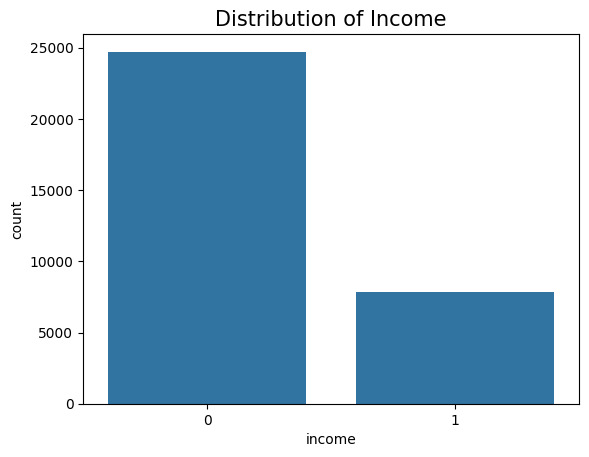

In [97]:
# Checking label counts
sns.countplot(x='income', data=data)
plt.title("Distribution of Income", fontsize = 15)
plt.show()

In [98]:
print('-> Total No. of records : {}\n'.format(len(data)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(data[data['income']==1])/32561)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(data[data['income']==0])/32561)*100, 2)))

-> Total No. of records : 32561

-> Number of people making more that >50K : 24.08%

-> Number of people making less than or equal to <=50K : 75.92%


*The distribution of the target column, I find that the people with less than or equals to 50K annual income are 75.92% and the no. of people making more than 50K is 24.08%, so it's clear that the dataset is unbalanced.*

### Age

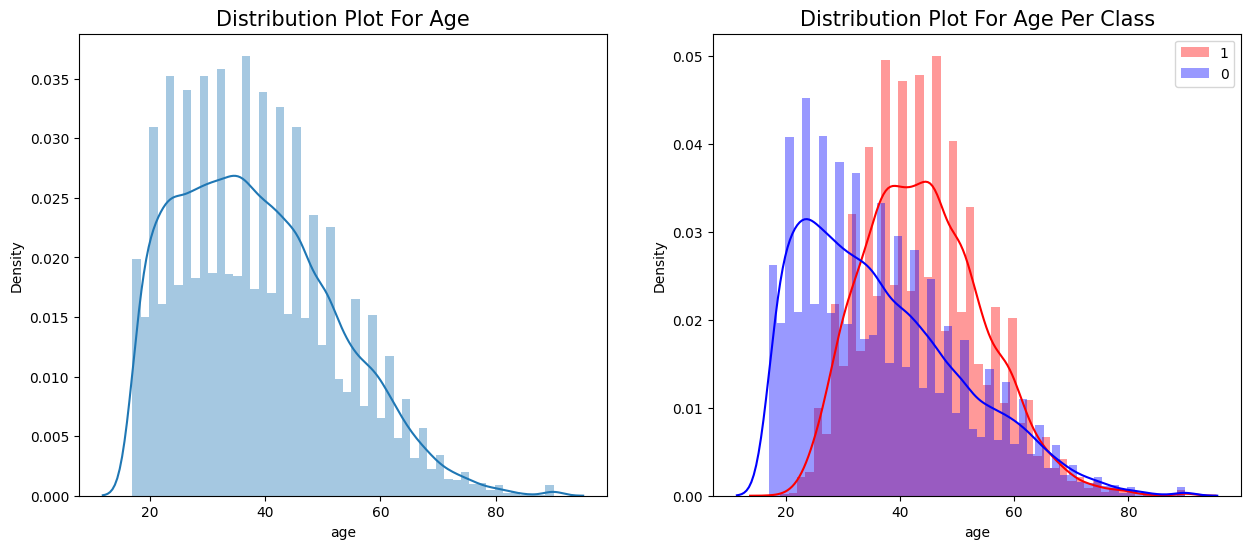

In [99]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(data['age'])
plt.title('Distribution Plot For Age', fontsize = 15)

# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(data[data['income']==1]['age'], label='1', color='red')
sns.distplot(data[data['income']==0]['age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

* *On taking a look at the result of distribution plot for age column, I can see that the most no of people are young.*
* *And The distributions for age per class have some overlap on the far right-hand side.*
* *By looking distribution plot for age per class graph we can say that there are relatively less young people who have an annual income is more than 50K.*

### Workclass

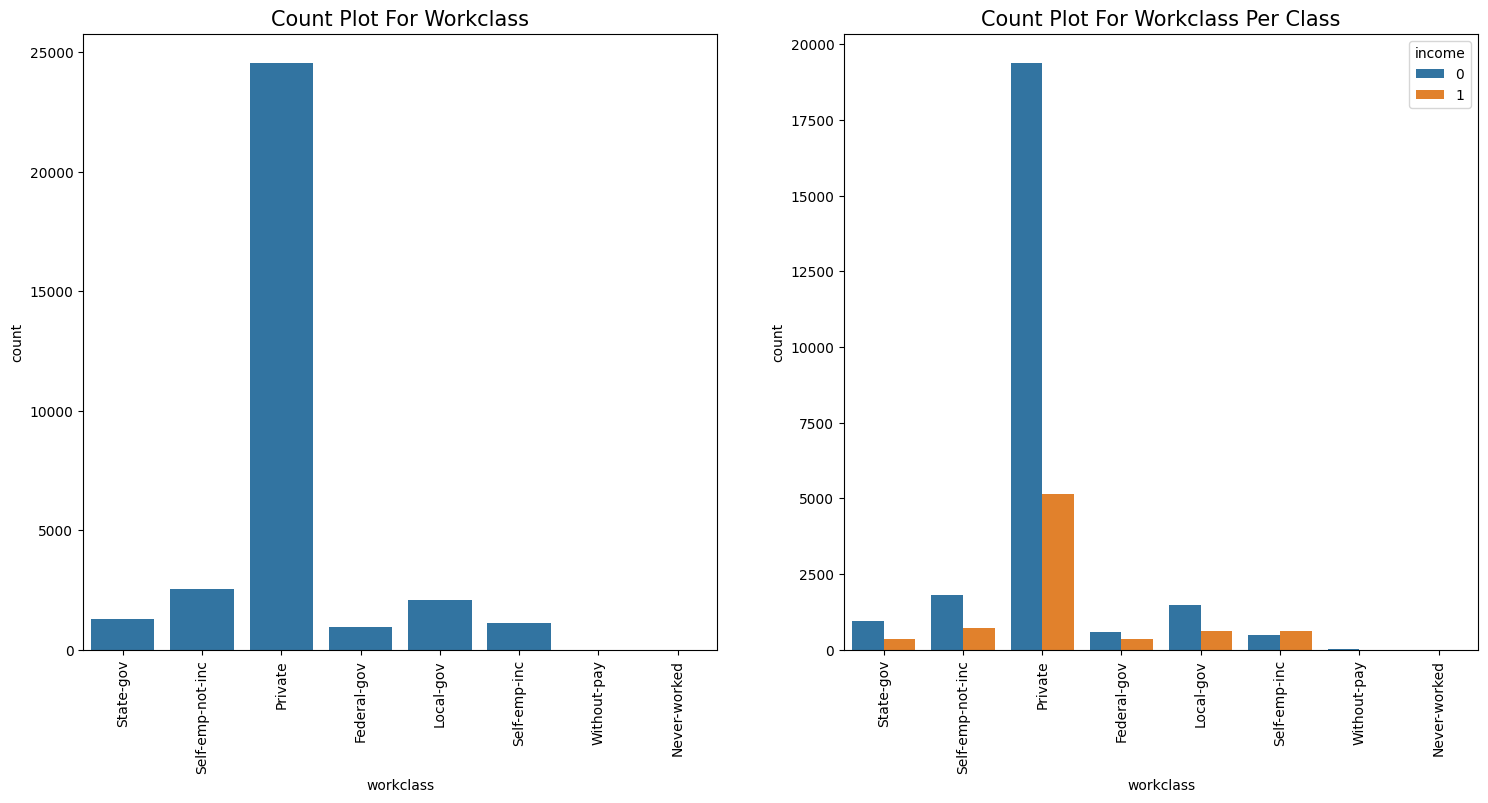

In [100]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data=data, x='workclass')
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=data, x='workclass', hue='income')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

* *In this dataset most number of people are working in private sector.* *
* *Taking look at the second plot above, I can see that who have an annual income is more than 50K or less than 50K are work in private.*

### Education and Education Number

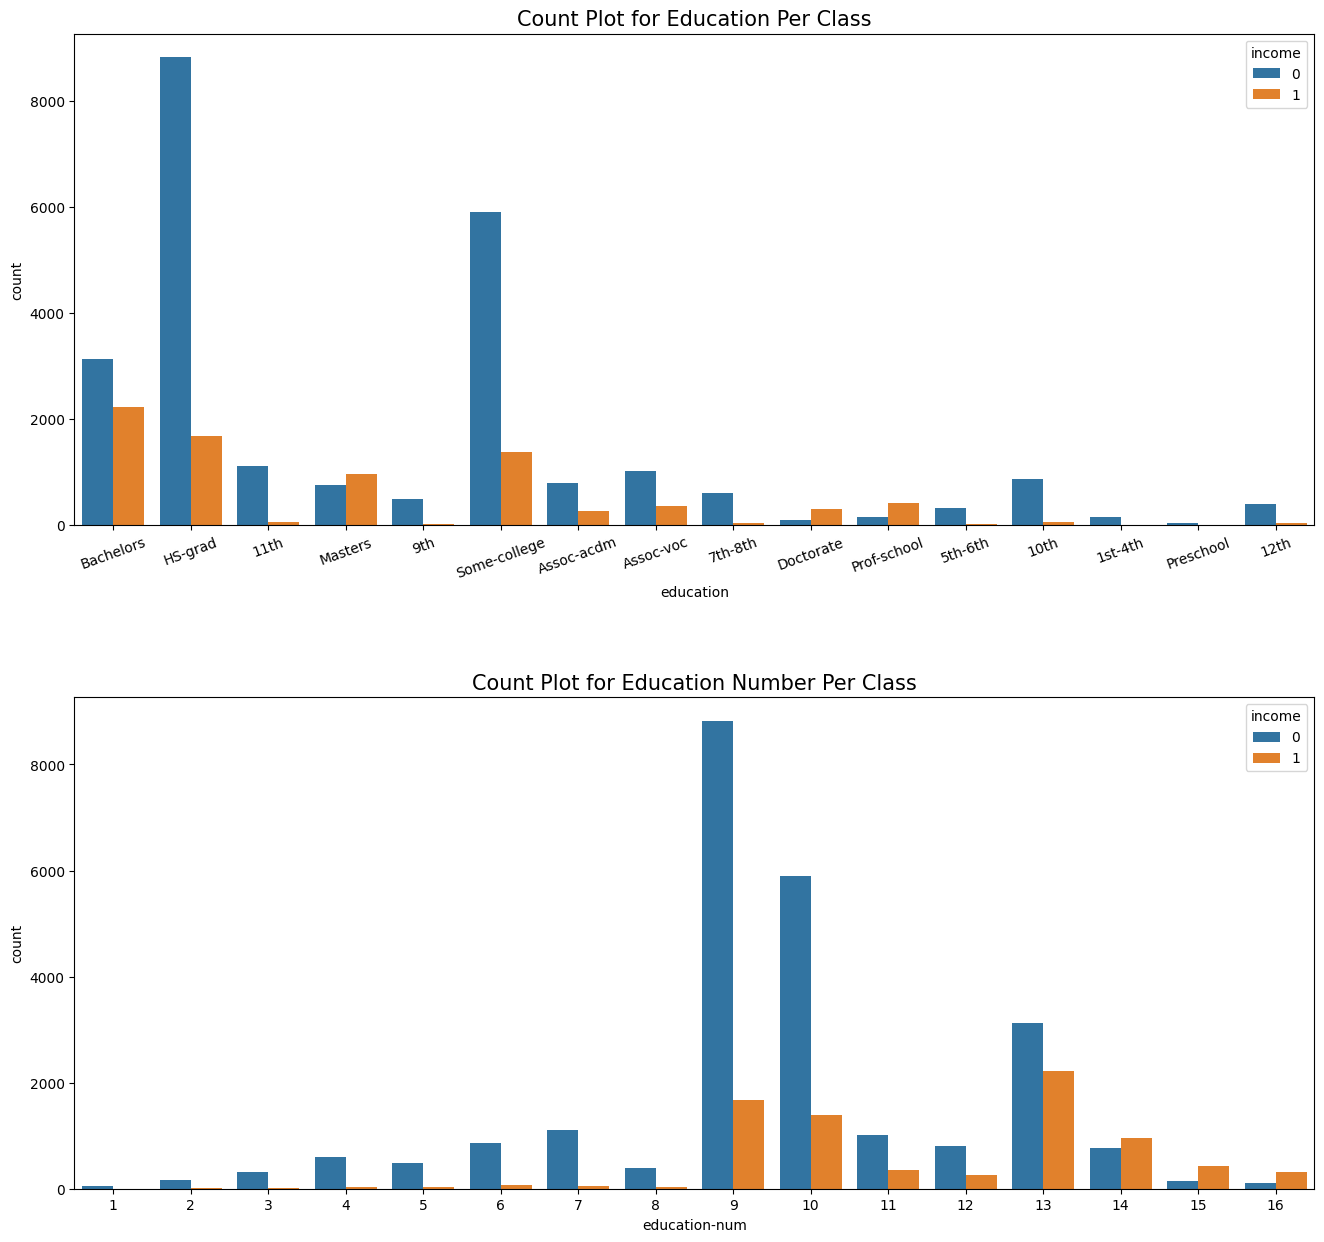

In [101]:
# Count Plot for Education Per Class
plt.figure(figsize=[16,15])
plt.subplot(2,1,1)
sns.countplot(x='education', data=data, hue='income')
plt.xticks(rotation=20)
plt.title("Count Plot for Education Per Class", fontsize = 15)

# Count Plot for Education Number Per Class
plt.subplot(2,1,2)
sns.countplot(x='education-num', data=data, hue='income')
plt.title("Count Plot for Education Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

In [102]:
education_classes = data['education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class, data[data['education'] == educ_class]['education-num'].unique()))

Bachelors, the Education Number is [13]
HS-grad, the Education Number is [9]
11th, the Education Number is [7]
Masters, the Education Number is [14]
9th, the Education Number is [5]
Some-college, the Education Number is [10]
Assoc-acdm, the Education Number is [12]
Assoc-voc, the Education Number is [11]
7th-8th, the Education Number is [4]
Doctorate, the Education Number is [16]
Prof-school, the Education Number is [15]
5th-6th, the Education Number is [3]
10th, the Education Number is [6]
1st-4th, the Education Number is [2]
Preschool, the Education Number is [1]
12th, the Education Number is [8]


In [103]:
# education & education number column are just the same, so I am dropping education number column.
data.drop(labels='education-num', axis=1, inplace=True)

* *From the analysis above, It's clear that **education** & **education number** column are **just the same.** so I am dropping education number column.*

* *And In this dataset Most number of people are high school graduates with 9 to 10 years of education.* 

### Gender

Text(0.5, 1.0, 'Countplot for Gender Per Class')

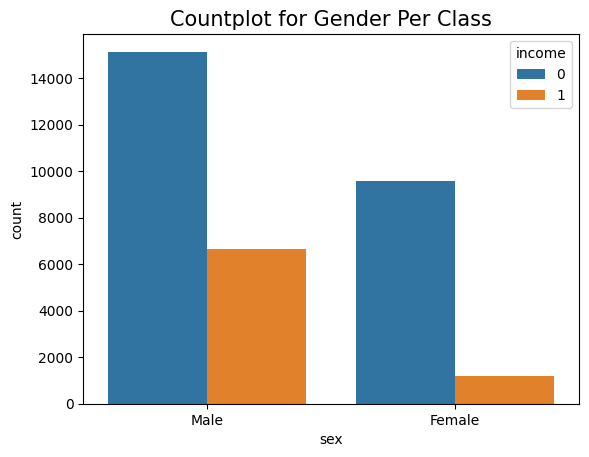

In [104]:
# Count Plot For Gender Per Class
sns.countplot(x='sex' ,data=data, hue='income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

* *The number of male candidates are more than female.*
* *When Comparing male and female, more percentage of male candidates are earn more than 50K.*

### Maritial Status

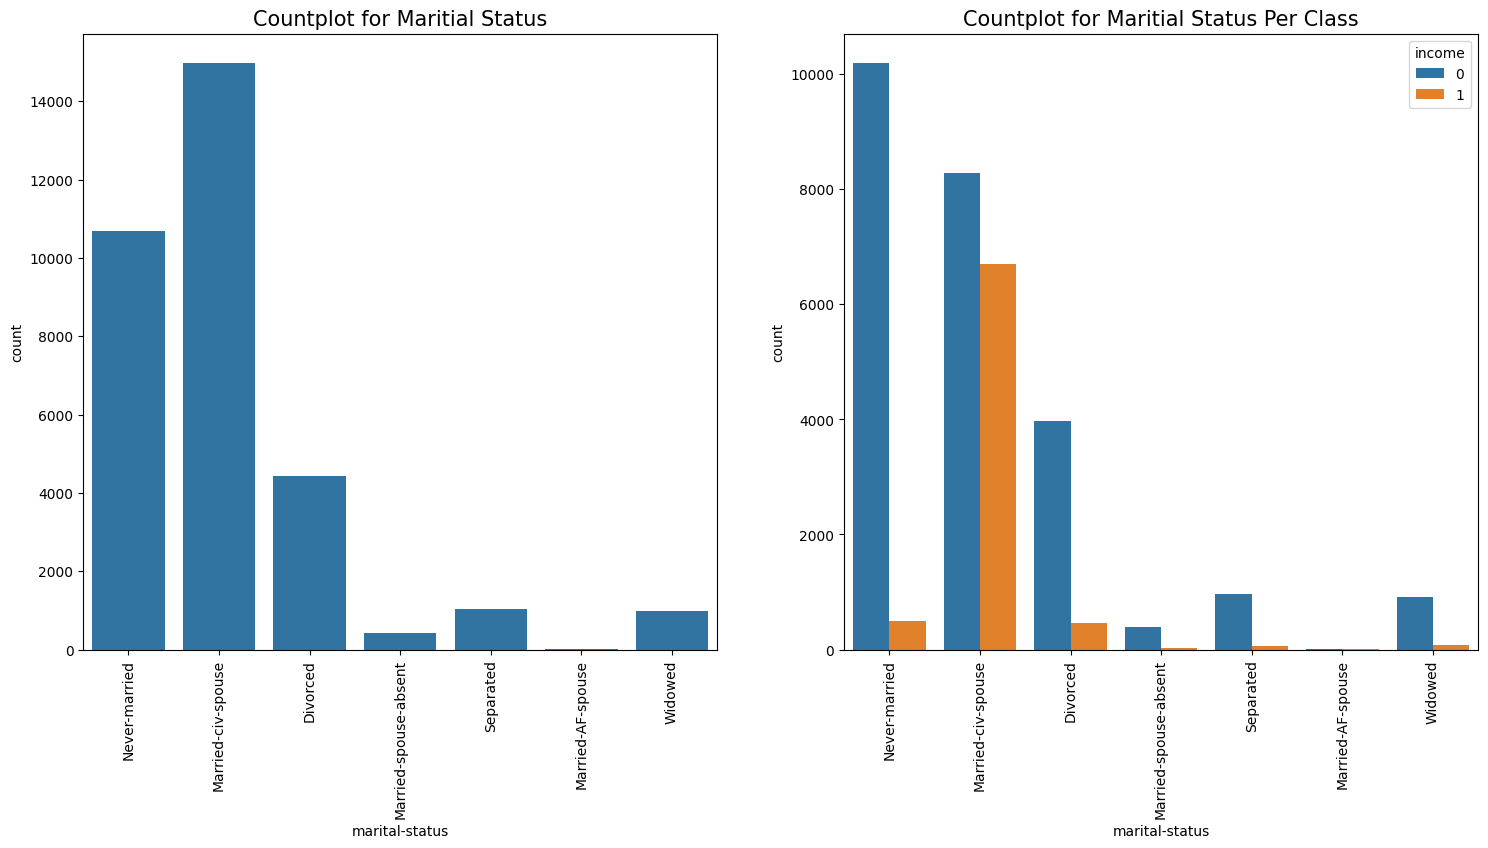


 --Value Counts-- 

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


In [105]:
# Countplot for Maritial Status
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data, x='marital-status')
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(data, x='marital-status', hue='income')
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(data['marital-status'].value_counts())

* *Most of the people whose annual income is more than 50K, their marital status is married.*

In [106]:
# Transforming Maritial Status column with value as either married or not married.
data = data.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})

### Relationship

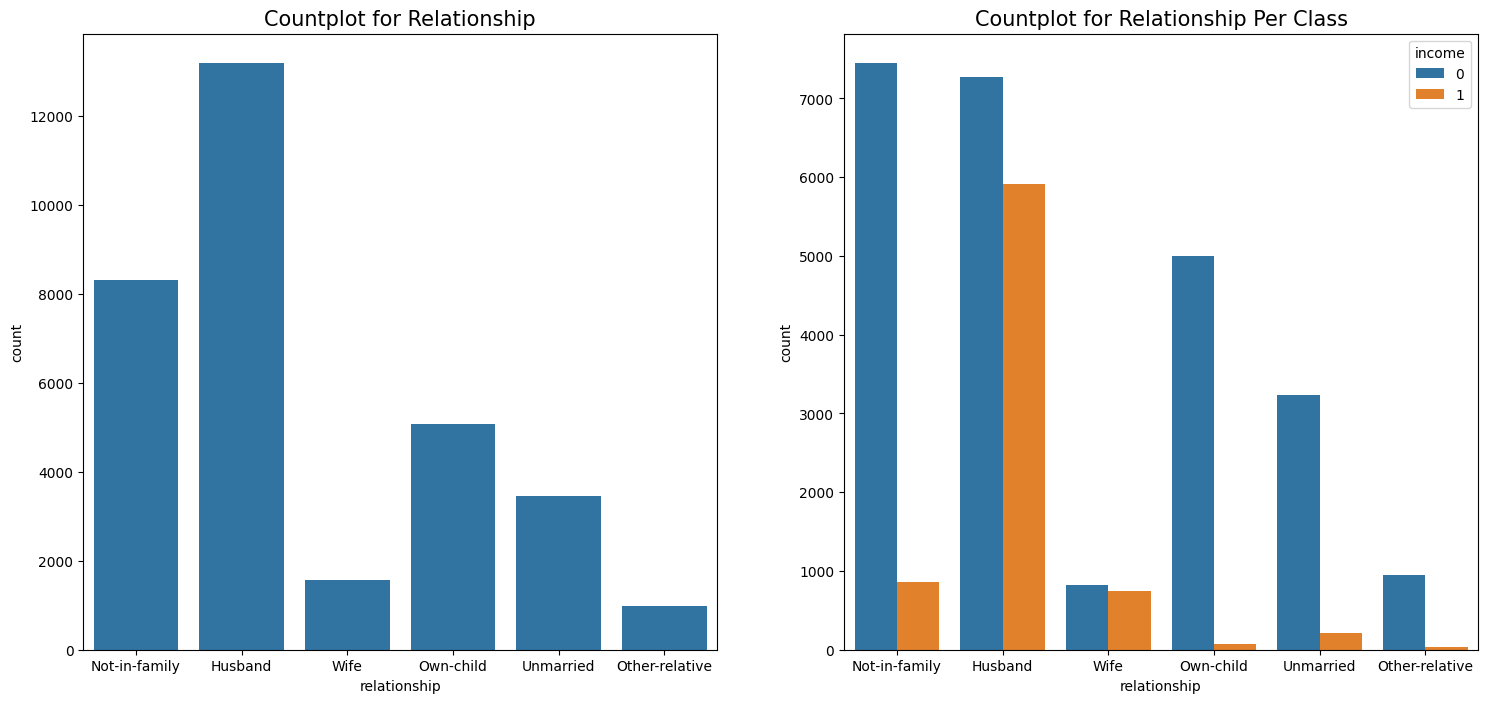


 --Value Counts-- 

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64


In [107]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data, x='relationship')
plt.title('Countplot for Relationship', fontsize = 15)
plt.subplot(1,2,2)
sns.countplot(data, x='relationship', hue='income')
plt.title('Countplot for Relationship Per Class', fontsize = 15)
plt.show()
print('\n --Value Counts-- \n')
print(data['relationship'].value_counts())

### Race

Text(0.5, 1.0, 'Countplot for Race Per Class')

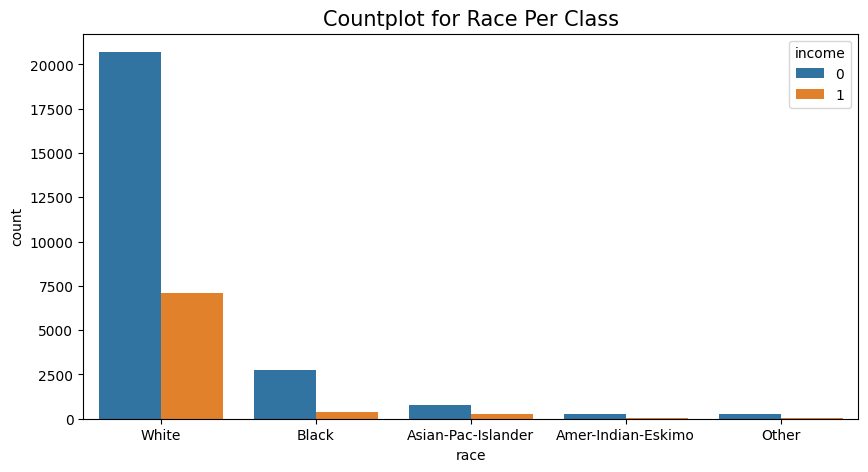

In [108]:
plt.figure(figsize=[10,5])
sns.countplot(data, x='race', hue='income')
plt.title('Countplot for Race Per Class', fontsize = 15)

* *In this dataset majority of information about white race is more while all other races are lesser.*

### Country

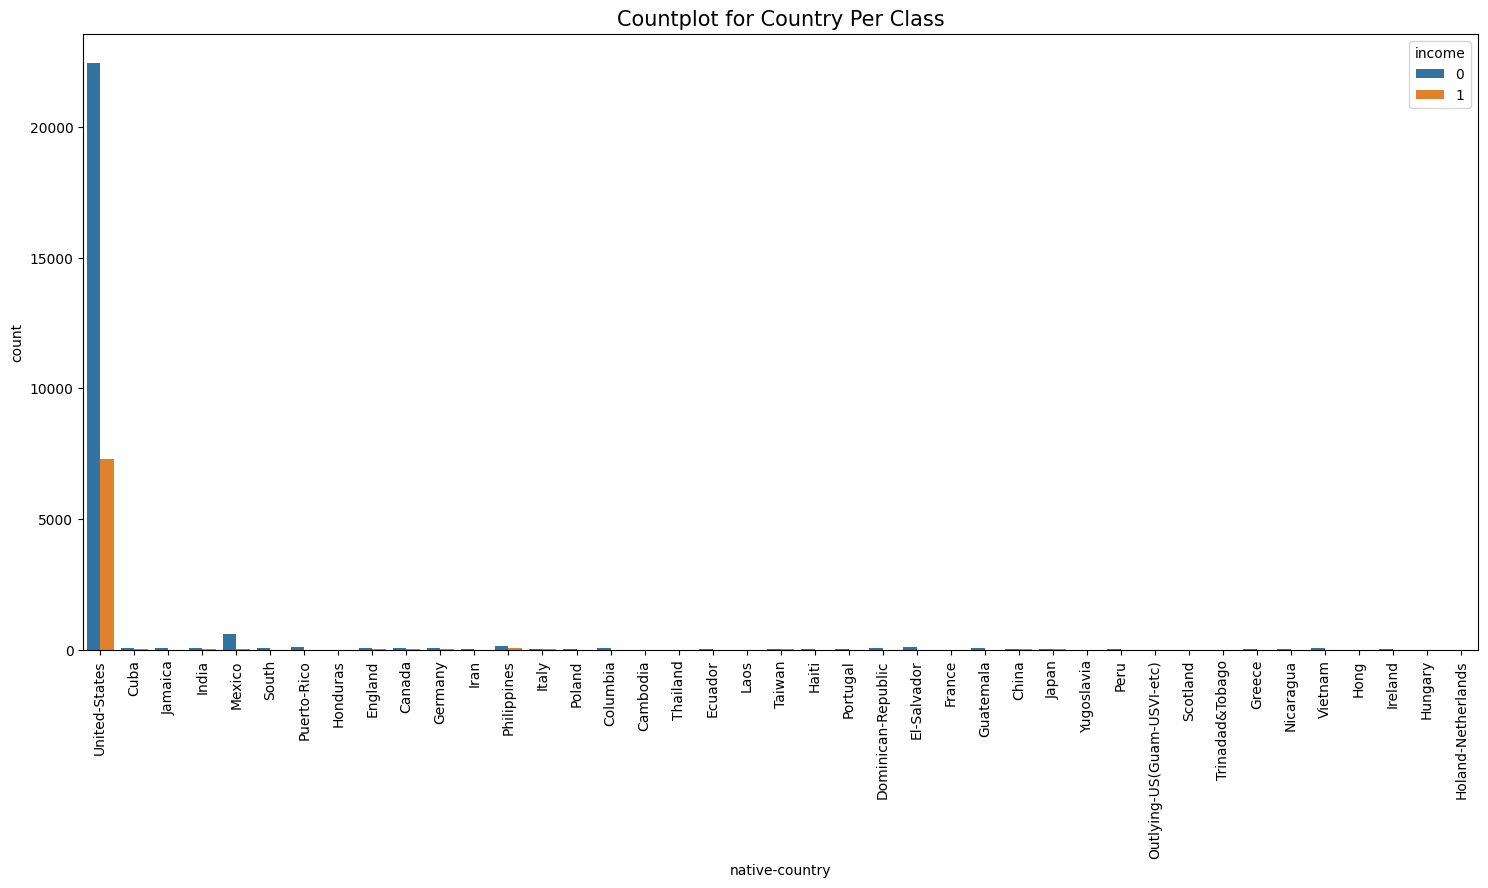


 --Value Counts-- 

native-country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [109]:
plt.figure(figsize=[18,8])
sns.countplot(data, x='native-country', hue='income')
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(data['native-country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(data[data['native-country']=='United-States'])/32561*100,2)))

print('{}% people belong from other country.'
      .format(round(len(data[data['native-country']!='United-States'])/32561*100,2)))

* *From analysis above, 91.38% peoples are from United-states and only 8.62% people belong from other countries.*
* *And There are 41 countries in this column, so it's better if we transform this feature with value as either United States or Other*

In [110]:
# Transforming native country column with value as either United States or Other.
countries = data['native-country'].unique()[1:]
data['native-country'] = data['native-country'].replace(to_replace=countries, value='Other')

# Transforming native country column with value as either United States or Other.
countries = data['native-country'].unique()[1:]
data['native-country'] = data['native-country'].replace(to_replace=countries, value='Other')

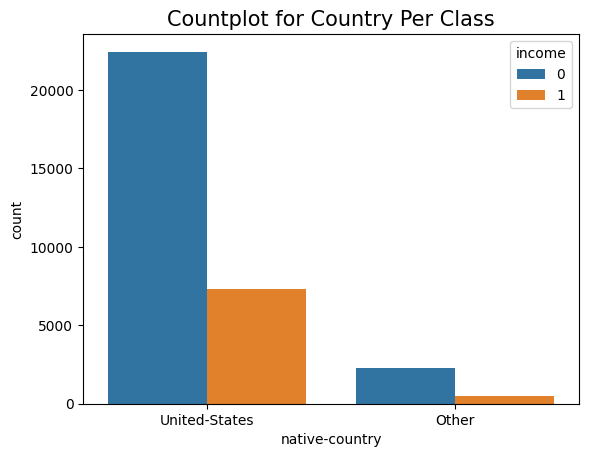

In [111]:
# Countplot for Country Per Class
sns.countplot(data, x='native-country', hue='income')
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

* *Now it's look good*

### Occupation

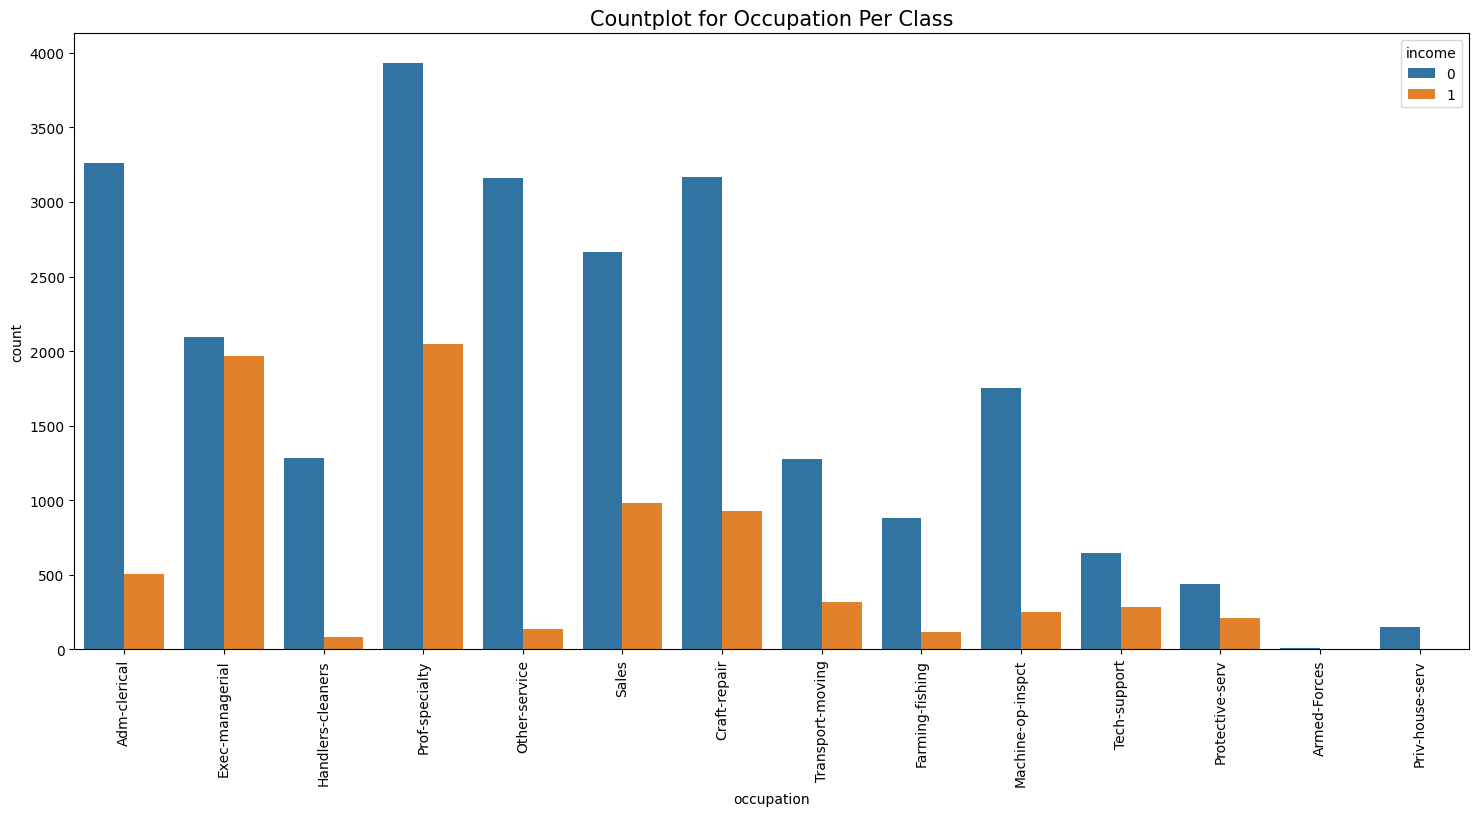

In [112]:
plt.figure(figsize=[18,8])
sns.countplot(data, x='occupation', hue='income')
plt.title('Countplot for Occupation Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

* *In occupation column the values are well distributed in all categories*

### Hours per week

Text(0.5, 1.0, 'Distribution plot for hours per week')

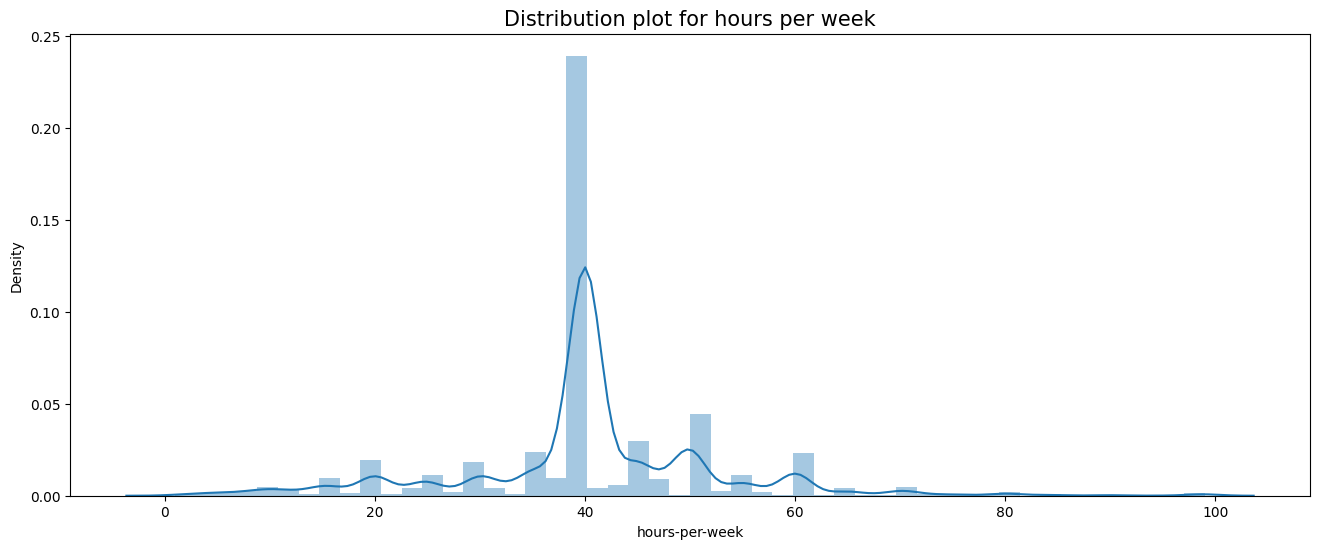

In [113]:
# Distribution plot for hours per week column
plt.figure(figsize=[16,6])
sns.distplot(data['hours-per-week'])
plt.title('Distribution plot for hours per week', fontsize = 15)

* *By looking distribution plot for hours per weak column our data is aligned around the centre.*
* *In this dataset most of the people work 30 to 40 hours per week*

## Data Transformation

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [115]:
# Categorical features
cat_df = data.select_dtypes(include=['object'])
num_df = data.select_dtypes(include=['int64'])

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status : ['not married' 'married'] 

occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex : ['Male' 'Female'] 

native-country : ['United-States' 'Other'] 



In [116]:
# Creating dummies variables
data_dummie = pd.get_dummies(data,drop_first=True)
data_dummie.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_United-States
0,39,77516,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,50,83311,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,38,215646,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,True
3,53,234721,0,0,40,0,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
4,28,338409,0,0,40,0,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False


In [117]:
print("Total No. of features after creating dummie variable : {}\n".format(len(data_dummie.columns)))
print('--Features--\n')
for i in data_dummie.columns:
    print(i)
print('---------------------------')

Total No. of features after creating dummie variable : 53

--Features--

age
fnlwgt
capital-gain
capital-loss
hours-per-week
income
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital-status_not married
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
relationship_Not-in-family
relationship_Other-relative
relationship_Own-ch

# 4.Feature Selection

In [118]:
from sklearn.preprocessing import LabelEncoder
temp_data = data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['income'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

marital-status    0.434944
relationship      0.250918
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
sex               0.215980
capital-loss      0.150526
education         0.079317
race              0.071846
native-country    0.038942
occupation        0.034625
fnlwgt            0.009463
workclass         0.002693
dtype: float64


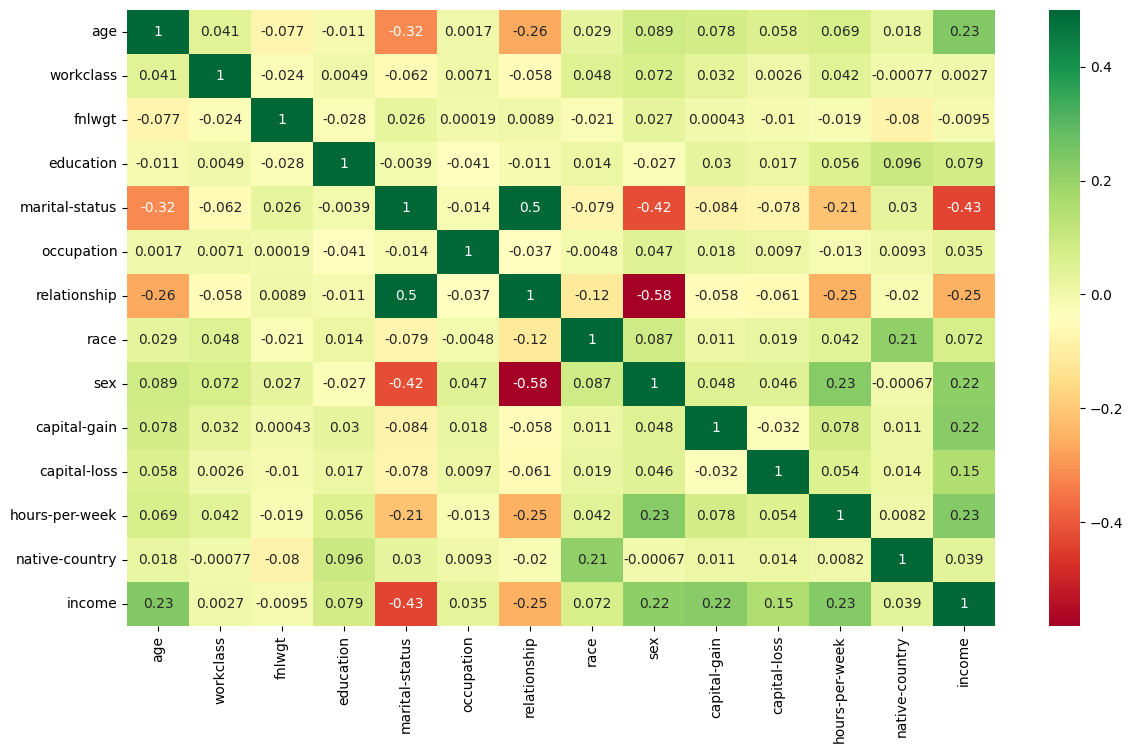

In [119]:
# Correlation Heatmap
plt.figure(figsize=[14,8])
sns.heatmap(temp_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

In [120]:
# Droping those features which we are not going to use
final_features = data_dummie.drop(['fnlwgt','workclass_Local-gov', 'workclass_Never-worked','workclass_Private',
                                         'workclass_Self-emp-inc','workclass_Self-emp-not-inc', 'workclass_State-gov',
                                         'workclass_Without-pay'], axis=1)

### Declaring dependent and independent variable

In [121]:
X = final_features.drop(['income'],axis=1)
y = final_features['income']

### Feature Scaling

In [122]:
# Feature scaling on training data
scaler = StandardScaler()
scaler.fit(X[['age', 'capital-gain', 'capital-loss', 'hours-per-week']])

StandardScaler()

In [123]:
input_scaled = scaler.transform(X[['age', 'capital-gain', 'capital-loss', 'hours-per-week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age', 'capital-gain', 'capital-loss', 'hours-per-week'])

In [124]:
X_scaled = scaled_data.join(X.drop(['age','capital-gain', 'capital-loss','hours-per-week'],axis=1))

### Fixing imbalanced dataset

In [125]:
# Fixing imbalanced dataset by oversampling
rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(X_scaled,y)

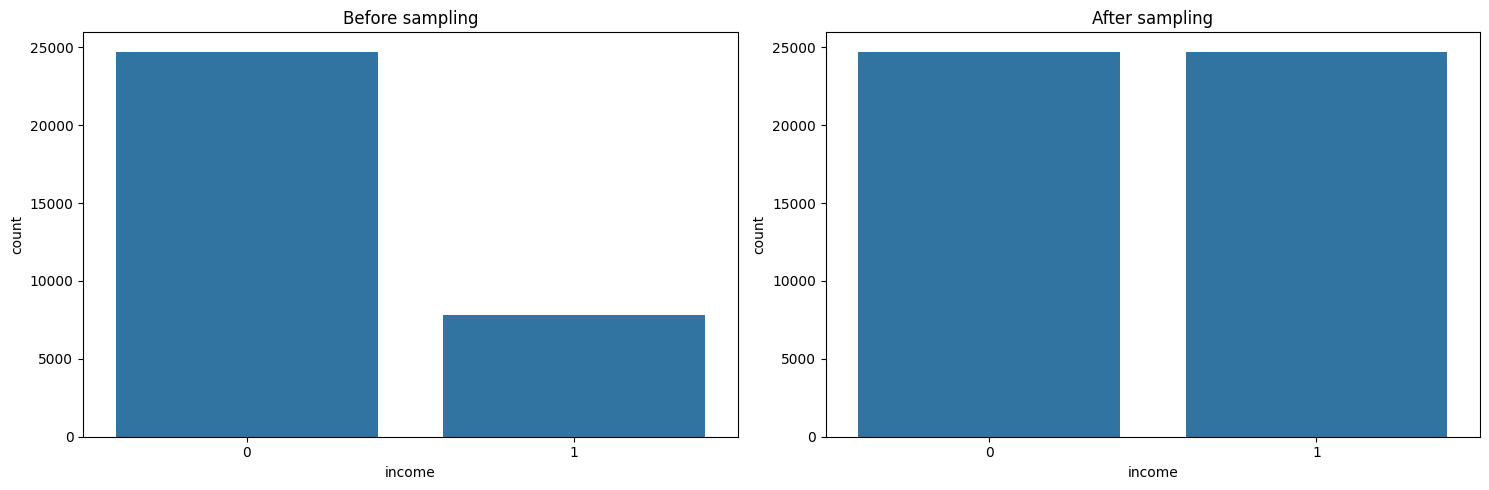

Before sampling : 
income
0    24720
1     7841
Name: count, dtype: int64

After sampling : 
income
0    24720
1    24720
Name: count, dtype: int64


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Before sampling
plt.figure(figsize=[15, 5])

# Before sampling
plt.subplot(1, 2, 1)
sns.countplot(x='income', data=data_dummie)
plt.title("Before sampling")

# After sampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_sampled.squeeze())
plt.title("After sampling")

plt.tight_layout()
plt.show()

print('Before sampling : \n{}'.format(y.value_counts()))
print('\nAfter sampling : \n{}'.format(y_sampled.value_counts()))


# 5.Model Development

### Training and Testing Data

In [127]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

## 5.1 Logistic Regression Model

In [128]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)
y_pred_train_lr = lr.predict(x_train)

In [129]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_lr), 4))
print('F1 score:', round(f1_score(y_test, y_pred_lr), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_lr), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_lr), 4))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.8302
F1 score: 0.8321

-----Train Data Accuracy----
Accuracy score: 0.82
F1 score: 0.8248


## 5.2 Decision Tree Classifier

In [130]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=0)

# Training Model
dt.fit(x_train,y_train)
 
# Model Summary
y_pred_dt = dt.predict(x_test)
y_pred_train_dt = dt.predict(x_train)

In [131]:
print("-----Test Data Accuracy----")
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 4))
print('F1 score:', round(f1_score(y_test, y_pred_dt), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_dt), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_dt), 4))

-----Test Data Accuracy----
Decision Tree Classifier:
Accuracy score: 0.8227
F1 score: 0.8343

-----Train Data Accuracy----
Accuracy score: 0.8238
F1 score: 0.8373


## 5.3 Random Forest Classifier

In [132]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=30)

# Training Model
rfc.fit(x_train,y_train)

# Model summary
y_pred_rfc = rfc.predict(x_test)
y_pred_train_rfc = rfc.predict(x_train)

In [133]:
print("-----Test Data Accuracy----")
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 4))
print('F1 score:', round(f1_score(y_test, y_pred_rfc), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_rfc), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_rfc), 4))

-----Test Data Accuracy----
Random Forest Classifier:
Accuracy score: 0.8227
F1 score: 0.9065

-----Train Data Accuracy----
Accuracy score: 0.9527
F1 score: 0.9545


## 5.4 Support Vector Classifier

In [134]:
# Model Building
from sklearn.svm import SVC
svc = SVC()

# Training Model
svc.fit(x_train,y_train)

# Model Summary
y_pred_svc = svc.predict(x_test)
y_pred_train_svc = svc.predict(x_train)

In [135]:
print("-----Test Data Accuracy----")
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc), 4))
print('F1 score:', round(f1_score(y_test, y_pred_svc), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_svc), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_svc), 4))

-----Test Data Accuracy----
Support Vector Classifier:
Accuracy score: 0.8398
F1 score: 0.8445

-----Train Data Accuracy----
Accuracy score: 0.8363
F1 score: 0.8439


## 5.5 GradientBoosting Classifier

In [136]:
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
gbtc = GradientBoostingClassifier(random_state=0)

# Training Model
gbtc.fit(x_train,y_train)

# Model summary
y_pred_gbtc = gbtc.predict(x_test)
y_pred_train_gbtc = gbtc.predict(x_train)

In [137]:
print("-----Test Data Accuracy----")
print('GradientBoostingClassifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gbtc), 4))
print('F1 score:', round(f1_score(y_test, y_pred_gbtc), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_gbtc), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_gbtc), 4))

-----Test Data Accuracy----
GradientBoostingClassifier:
Accuracy score: 0.8453
F1 score: 0.8482

-----Train Data Accuracy----
Accuracy score: 0.8374
F1 score: 0.8431


## 5.6 XGBoost Classifier

In [138]:
# Model Building
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

# Training Model
xgb.fit(x_train, y_train)

# Mode summary
y_pred_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

In [139]:
print("-----Test Data Accuracy----")
print('XGB Classifier:')
print('Accuracy score:',round(accuracy_score(y_test, y_pred_xgb), 4))
print('F1 score:',round(f1_score(y_test, y_pred_xgb), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:',round(accuracy_score(y_train, y_pred_train_xgb), 4))
print('F1 score:',round(f1_score(y_train, y_pred_train_xgb), 4))

-----Test Data Accuracy----
XGB Classifier:
Accuracy score: 0.8686
F1 score: 0.8716

-----Train Data Accuracy----
Accuracy score: 0.8777
F1 score: 0.8823


## 5.7 Hyperparameter Optimization

In [140]:
# XGB Classifier Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier=XGBClassifier()
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)

In [141]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [ ]:
# Again Training our model with best parameter
xgb_tune = XGBClassifier(random_state=0,min_child_weight=3,max_depth= 15,
                    learning_rate = 0.1,gamma= 0.1,
                    colsample_bytree= 0.7)
xgb_tune.fit(x_train,y_train)
y_pred_xgb_tune = xgb_tune.predict(x_test)

# 6. Model Evaluation

In [ ]:
print("-----Test Data Accuracy----")
print('Gradient Boosting Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb_tune), 3))
print('F1 score:', round(f1_score(y_test, y_pred_xgb_tune), 2))

-----Test Data Accuracy----
Gradient Boosting Classifier:
Accuracy score: 0.877
F1 score: 0.88


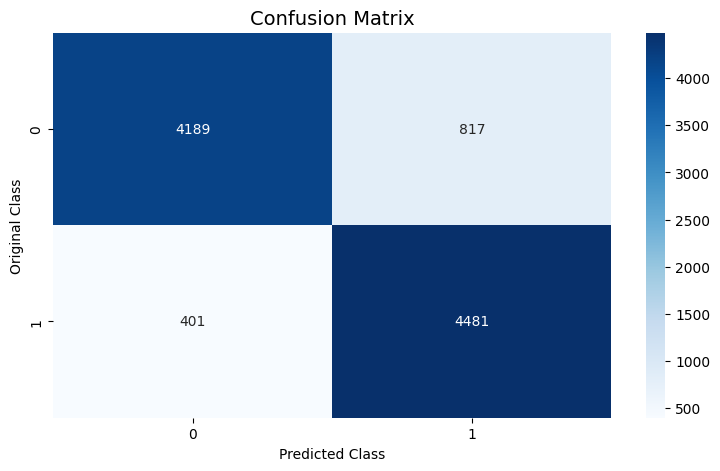

In [ ]:
# Plot confusion matrix
plt.figure(figsize=[9,5])
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tune), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
# Classificaton Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_tune))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      5006
           1       0.85      0.92      0.88      4882

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888



### ROC Curve

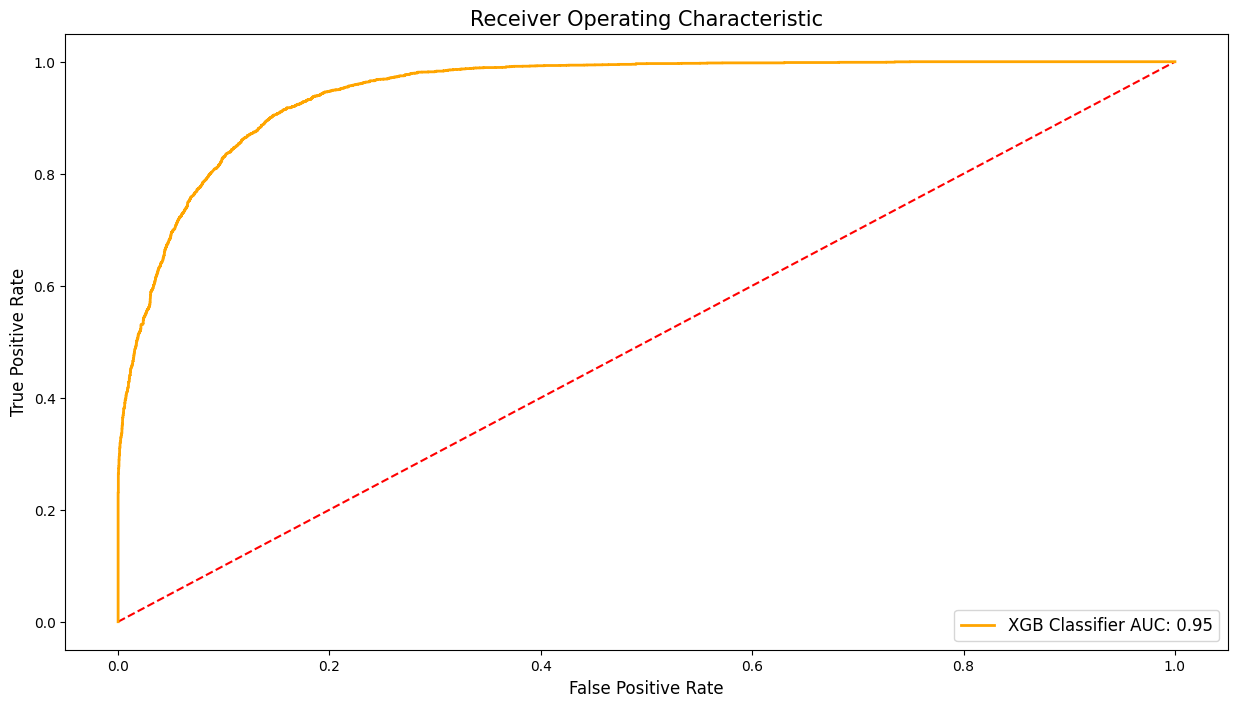

In [ ]:
# Plot Receiver Operating Characteristic
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (15, 8))
plt.plot([0,1], [0,1], 'r--')

probs = xgb_tune.predict_proba(x_test)
# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'XGB Classifier' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'orange', label = label, linewidth = 2)
    
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.legend(loc = 'lower right',fontsize = 12)
plt.show()

# Business solution/ Interpretation of results obtained


* So as I try different Classification Alorithms and found that **"XGBoost Classifier"** is Performed the best with an **F1 score of 0.88**,  **AUC Score of 0.95** and **Accuracy score of 0.87**

* I also Performed **hyperparameter tuning** on XGBoost classifier and get the best tuned parameter.
* Used multiple Performance metrics to ensure that the model is performing correctly and is not overfitting on the data.

* Insights: Key findings from the model.
* Example: age, capital_gain, capital_loss, hours_per_week, education, sex, marital_status, country,race,relationship,occupation are strong indicators of higher income.
The most number of people are young, white, male, high school graduates with 9 to 10 years of education, work 40 hours per week and belong from United-States.
While doing exploratory analysis, I found out that the most no. of people are young. But relatively less young people who have an annual income is more than $50K.
* Business Implications: How the insights can help in decision-making.
* Example: Targeted training programs for employees in lower-income brackets.


# Future Work

* We can use feature_importances_, LIME, SHAPE to understand more regarding features and take a decision accordingly.
* Potential improvements and future research directions.
* Recap of the problem, methodology, and key findings.
* Example: Incorporating more features, using deep learning models.
* Can remove race,relationship


<Figure size 1500x800 with 0 Axes>

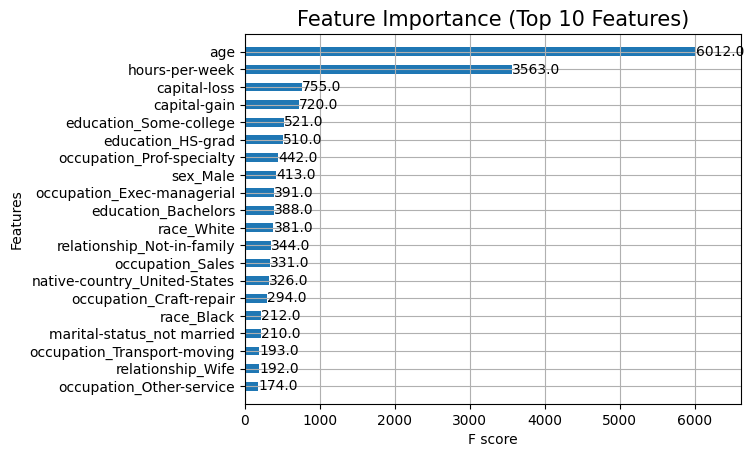

In [142]:
# Feature Importance
from xgboost import plot_importance
importance = xgb_tune.feature_importances_
features = x_train.columns

# Plotting feature importance
plt.figure(figsize=[15, 8])
plot_importance(xgb_tune, max_num_features=20, height=0.5)
plt.title('Feature Importance (Top 10 Features)', fontsize=15)
plt.show()

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

In [144]:
# Applying LIME for Local Interpretability
# Applying LIME
import lime
import lime.lime_tabular
import shap
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(x_train), 
                                                   feature_names=x_train.columns, 
                                                   class_names=['<=50', '>50K'], 
                                                   mode='classification')

# Explain a prediction
i = 0  # Example index, you can choose any
exp = explainer.explain_instance(x_test.iloc[i], xgb_tune.predict_proba)
exp.show_in_notebook(show_all=False)


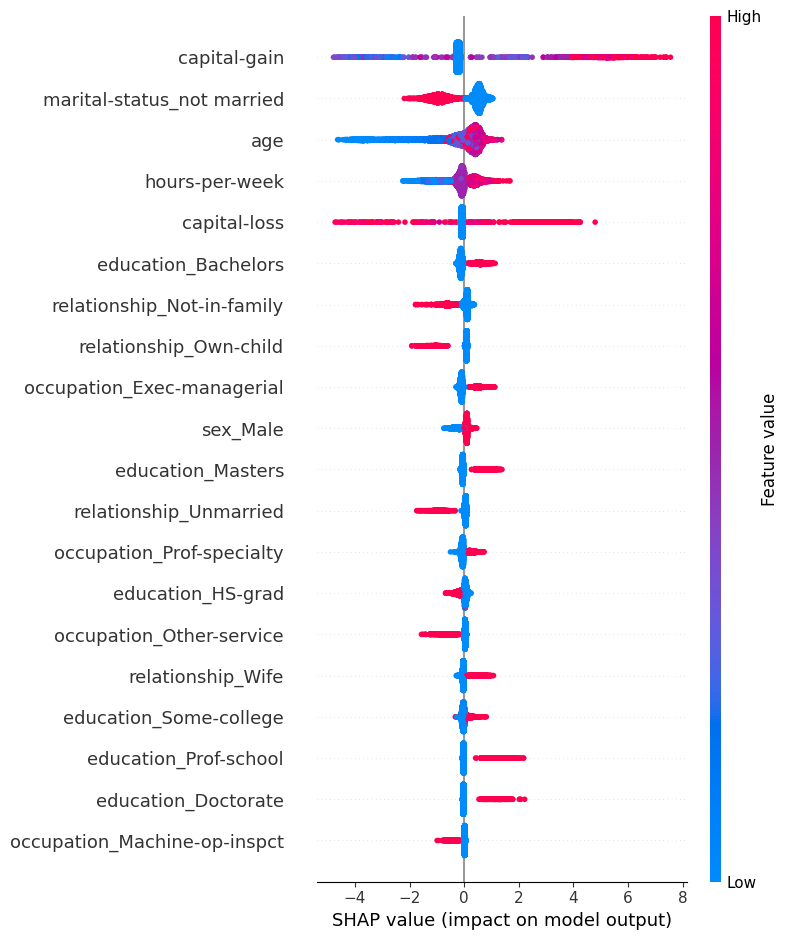

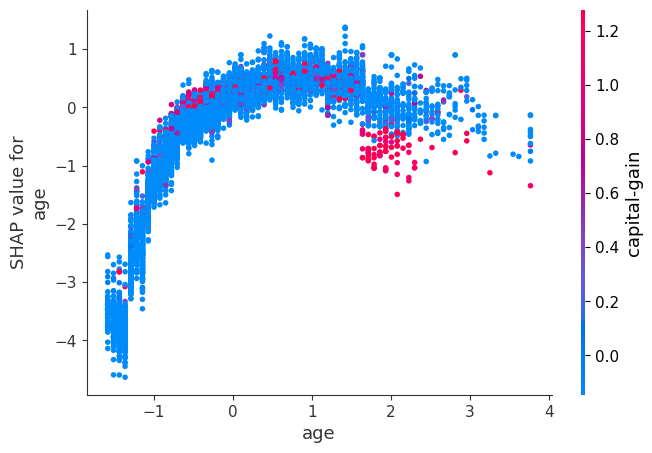

In [147]:
# Applying SHAP for Global and Local Interpretability
# Applying SHAP
explainer = shap.TreeExplainer(xgb_tune)
shap_values = explainer.shap_values(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test)

# Dependence plot for a specific feature
shap.dependence_plot("age", shap_values, x_test)

# Force plot for a specific prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])


## 6.1 Save Model & Data Scaler to reuse it again

In [ ]:

# Save Model and Data Scaler
from pickle import dump
from pickle import load

# save the model
dump(xgb, open('xgb_model.pkl', 'wb'))

# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

# 7. Model Deployment

## 7.1 Load Model and Data Scaler

In [ ]:
import pickle
# load the model
model = pickle.load(open('/Users/rachanabaldania/Code/Employee-Income-Prediction/xgb_model.pkl', 'rb'))
# load the scaler
scalers = pickle.load(open('/Users/rachanabaldania/Code/Employee-Income-Prediction/scaler.pkl', 'rb'))

## 7.2 Test the Model by giving input

In [ ]:
import numpy as np

# Assuming scalers and model are defined elsewhere in your code

def prediction(age, capital_gain, capital_loss, hours_per_week, education, sex, marital_status, country, race, relationship, occupation):
    age = int(age)
    hours = int(hours_per_week)
    gain = int(capital_gain)
    loss = int(capital_loss)
    sex = 1 if sex == 'Male' else 0
    marital = 0 if marital_status.lower() == 'married' else 1
    country = 1 if country == 'United-States' else 0

    # if condition match only assign '1' to that variable 
    _11th = 1 if education == '11th' else 0
    _12th = 1 if education == '12th' else 0
    _1st_4th = 1 if education == '1st-4th' else 0
    _5th_6th = 1 if education == '5th-6th' else 0
    _7th_8th = 1 if education == '7th-8th' else 0
    _9th = 1 if education == '9th' else 0
    _Assoc_acdm = 1 if education == 'Assoc-acdm' else 0
    assoc_voc = 1 if education == 'Assoc-voc' else 0
    bachelors = 1 if education == 'Bachelors' else 0
    doctorate = 1 if education == 'Doctorate' else 0
    HS_grad = 1 if education == 'HS-grad' else 0
    masters = 1 if education == 'Masters' else 0
    preschool = 1 if education == 'Preschool' else 0
    prof_school = 1 if education == 'Prof-school' else 0
    college = 1 if education == 'Some-college' else 0

    Armed_Forces = 1 if occupation == 'Armed-Forces' else 0
    Craft_repair = 1 if occupation == 'Craft-repair' else 0
    Exec_managerial = 1 if occupation == 'Exec-managerial' else 0
    Farming_fishing = 1 if occupation == 'Farming-fishing' else 0
    Handlers_cleaners = 1 if occupation == 'Handlers-cleaners' else 0
    Machine_op_inspct = 1 if occupation == 'Machine-op-inspct' else 0
    service = 1 if occupation == 'Service' else 0
    Priv_house_serv = 1 if occupation == 'Priv-house-serv' else 0
    Prof_specialty = 1 if occupation == 'Prof-specialty' else 0
    Protective_serv = 1 if occupation == 'Protective-serv' else 0
    Sales = 1 if occupation == 'Sales' else 0
    Tech_support = 1 if occupation == 'Tech-support' else 0
    Transport_moving = 1 if occupation == 'Transport-moving' else 0

    Not_in_family = 1 if relationship == 'Not-in-family' else 0
    Other_relative = 1 if relationship == 'Other-relative' else 0
    Own_child = 1 if relationship == 'Own-child' else 0
    Unmarried = 1 if relationship == 'Unmarried' else 0
    Wife = 1 if relationship == 'Wife' else 0

    Asian_Pac_Islander = 1 if race == 'Asian-Pac-Islander' else 0
    Black = 1 if race == 'Black' else 0
    Other = 1 if race == 'Other' else 0
    White = 1 if race == 'White' else 0

    # feature scaling on age, capital_gain, capital_loss, hours_per_week
    scaled_value = scalers.transform([[age, gain, loss, hours]])
    age, gain, loss, hours = scaled_value[0, 0], scaled_value[0, 1], scaled_value[0, 2], scaled_value[0, 3]

    features = [
        age, hours, gain, loss, _11th, _12th, _1st_4th, _5th_6th, _7th_8th, _9th, _Assoc_acdm,
        assoc_voc, bachelors, doctorate, HS_grad, masters, preschool, prof_school, college,
        marital, sex, country, Armed_Forces, Craft_repair, Exec_managerial, Farming_fishing,
        Handlers_cleaners, Machine_op_inspct, service, Priv_house_serv, Prof_specialty,
        Protective_serv, Sales, Tech_support, Transport_moving, Not_in_family, Other_relative,
        Own_child, Unmarried, Wife, Asian_Pac_Islander, Black, Other, White
    ]

    print(features)

    # Predict and convert the result to a standard Python integer
    prediction_result = model.predict(np.array([features]))[0].item()
    
    return prediction_result



In [ ]:
# age, capital_gain, capital_loss, hours_per_week, education, sex, marital_status, country,race,relationship,occupation
prediction(53,0,0, 40,'masters','Male','Married','United States',"White","Unmarried","Prof-specialty")

[np.float64(1.0570467320885653), np.float64(-0.03542944697277691), np.float64(-0.14592048355885345), np.float64(-0.21665952703259014), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


0